# Is it a really game day without College GameDay?

A Data Analytics Programming Project

By: Shan Ali, Callie Gilmore, Jocelyne Walker

## Setup

In [25]:
# import libraries
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

from datetime import datetime
import re

Populating the interactive namespace from numpy and matplotlib


In [26]:
# read data
cfb = pd.read_csv('Downloads/CFBeattendance.csv', encoding= 'unicode_escape').dropna()

## Data Wrangling

**Clean Opponent**

In [27]:
# clean opponent column, ex.'No. 25 Georgia'
def opp2conf(s):
    x = 0
    if len(s.rsplit('*')) is 2:
        x = 1
    return x

def opp_clean(s):
    x = re.findall(r'\w+',s.rstrip('*'))
    if x[0] == 'No':
        x = x[2:]
    return ' '.join(x)

cfb['conference_game'] = cfb['Opponent'].apply(opp2conf)
cfb['Opponent'] = cfb['Opponent'].apply(opp_clean)
#cfb.head()

**Clean Rank, TV, Opponent_Rank**

In [28]:
# clean Rank, TV, Opponent_Rank
cfb.loc[cfb.Rank.str[:] == 'NR','Rank'] = np.nan
cfb.loc[cfb.Opponent_Rank.str[:] == 'NR','Opponent_Rank'] = np.nan
m = cfb.TV.str[:] == 'Not on TV'
cfb.loc[~m,'TV'] = 1
cfb.loc[m,'TV'] = np.nan
#cfb.head()

**Clean Result**

In [29]:
# clean result
# get win dummy
cfb['Win'] = 0
cfb.loc[cfb.Result.str[0] == 'W','Win'] = 1

# get scores
cfb['Team_Score'] = cfb['Result'].apply(lambda x: re.findall(r'\d+',x)[0])
cfb['Opp_Score'] = cfb['Result'].apply(lambda x: re.findall(r'\d+',x)[1])

# get OT
def get_OT(s):
    ot = 0
    x = re.findall(r'OT',s)
    if x != []:
        ot = 1
        x = re.findall(r'(\d+)OT',s)
        if x != []:
            ot = x[0]
    return ot

cfb['OT'] = cfb['Result'].apply(get_OT)

**Clean New Coach and Tailgating**

In [30]:
# clean New Coach and Tailgating
cfb['New Coach'] = pd.get_dummies(cfb['New Coach'])[1]
cfb['Tailgating'] = pd.get_dummies(cfb['Tailgating'])[1]

**Clean Site**

In [31]:
# clean Site
def site2special(s):
    z = 0
    x = re.findall(r'\((.*?)\)',s)
    if x != []:
        z = 1
    return z

def gameday(s):
    z = 0
    x = re.findall(r'\((.*?)\)',s)
    if x != [] and x[0] == 'College GameDay':
        z = 1
    return z

def clean_site(s):
    #split at city?
    x = re.sub(r'\((.*?)\)','',s)
    #x = re.findall(r'\w+', x)
    return x

cfb['Special'] = cfb['Site'].apply(site2special)
cfb['GD'] = cfb['Site'].apply(gameday)
cfb['Site'] = cfb['Site'].apply(clean_site)

**Clean DateTime Features**

In [32]:
# convert all date info to DateTime
cfb['DateTime'] = pd.to_datetime(cfb['Date'] + ' ' + cfb['Time'])

**Drop redundant Features**

In [33]:
# drop redundant features
dropCol = ['Date','Time','Result','Year','Month','Day']
cfb.drop(columns=dropCol,inplace=True)

**Cleaned DataFrame**

In [34]:
cfb

,Team,Opponent,Rank,Site,TV,Attendance,Current Wins,Current Losses,Stadium Capacity,Fill Rate,...,Opponent_Rank,Conference,conference_game,Win,Team_Score,Opp_Score,OT,Special,GD,DateTime
0,Arkansas,Southwest Missouri State,NaN,"War Memorial StadiumLittle Rock, AR",NaN,53946,0,0,53727,1.004076,...,NaN,SEC,1,1,38,0,0,0,0,2000-09-02 20:00:00
1,Arkansas,Boise State,NaN,"War Memorial StadiumLittle Rock, AR",NaN,54286,1,0,53727,1.010404,...,NaN,SEC,1,1,38,31,0,0,0,2000-09-16 18:00:00
2,Arkansas,Alabama,NaN,"Razorback StadiumFayetteville, AR",1,51482,2,0,50019,1.029249,...,NaN,SEC,0,1,28,21,0,0,0,2000-09-23 20:00:00
3,Arkansas,Georgia,NaN,"Razorback StadiumFayetteville, AR",1,51162,3,0,50019,1.022851,...,25,SEC,0,0,7,38,0,0,0,2000-09-30 11:30:00
4,Arkansas,Louisiana Monroe,NaN,"Razorback StadiumFayetteville, AR",NaN,50947,3,1,50019,1.018553,...,NaN,SEC,1,1,52,6,0,0,0,2000-10-07 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6667,UTEP,New Mexico State,NaN,"Sun BowlEl Paso, TX",1,19412,0,3,51500,0.376932,...,NaN,CUSA,1,0,20,27,0,1,0,2018-09-22 17:30:00
6668,UTEP,North Texas,NaN,"Sun BowlEl Paso, TX",1,12809,0,5,51500,0.248718,...,NaN,CUSA,0,0,24,27,0,0,0,2018-10-06 17:30:00
6669,UTEP,UAB,NaN,"Sun BowlEl Paso, TX",1,10787,0,7,51500,0.209456,...,NaN,CUSA,0,0,0,19,0,0,0,2018-10-27 17:30:00
6670,UTEP,Middle Tennessee,NaN,"Sun BowlEl Paso, TX",1,9690,1,8,51500,0.188155,...,NaN,CUSA,0,0,32,48,0,0,0,2018-11-10 13:00:00


# Below I am just messing around with some visualizations

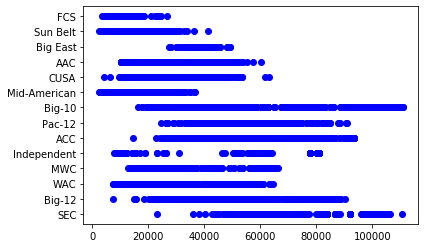

In [124]:
# Attendance by Conferece - Overall Not Super Helpful but can see SEC and Big 10 have highest peaks of attendance
plot(cfb['Attendance'], cfb['Conference'], marker='o', color='blue', linestyle='None')
xlabel=('Attendance')
ylabel=('Conference')
title=('Attendance versus Conference')
show()

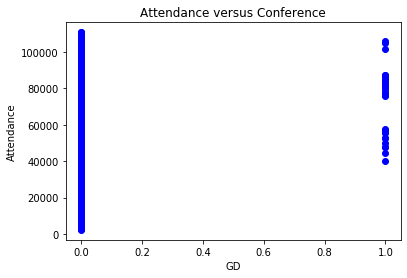

In [43]:
#Attendance vs GD - Not super telling although when GD is present, the lowest attendance is > 40,000
plot(cfb['GD'], cfb['Attendance'], marker='o', color='blue', linestyle='None')
xlabel('GD')
ylabel('Attendance')
title('Attendance versus GD')
show()

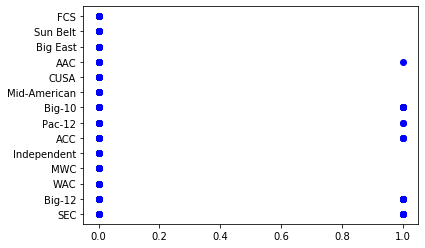

In [134]:
# GD vs Attendance - Not super helpful but shows there are only 6 conferences that have had GD
plot(cfb['GD'], cfb['Conference'], marker='o', color='blue', linestyle='None')
show()

In [52]:
# Next 2 plots im just messing around with grouping on conference but nothing super helpful
SEC = cfb[cfb['Conference'] == 'SEC']
Big12 = cfb[cfb['Conference'] == 'Big-12']
WAC = cfb[cfb['Conference'] == 'WAC']
MWC = cfb[cfb['Conference'] == 'MWC']
Ind = cfb[cfb['Conference'] == 'Independent']
ACC = cfb[cfb['Conference'] == 'ACC']
PAC12 = cfb[cfb['Conference'] == 'PAC-12']
Big10 = cfb[cfb['Conference'] == 'Big-10']
Mid = cfb[cfb['Conference'] == 'Mid-American']
CUSA = cfb[cfb['Conference'] == 'CUSA']
AAC = cfb[cfb['Conference'] == 'AAC']
BigEast = cfb[cfb['Conference'] == 'Big East']
SunBelt = cfb[cfb['Conference'] == 'Sun Belt']
FCS = cfb[cfb['Conference'] == 'FCS']

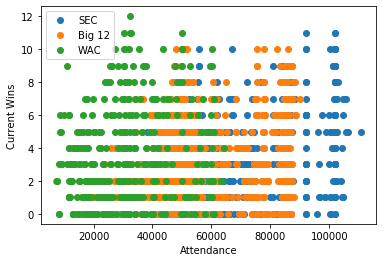

In [54]:
plot(SEC['Attendance'], SEC['Current Wins'], marker='o', linestyle='None', label='SEC')
plot(Big12['Attendance'], Big12['Current Wins'], marker='o', linestyle='None', label='Big 12')
plot(WAC['Attendance'], WAC['Current Wins'], marker='o', linestyle='None', label='WAC')
xlabel('Attendance')
ylabel('Current Wins')
legend(numpoints=1, loc='best')
show()

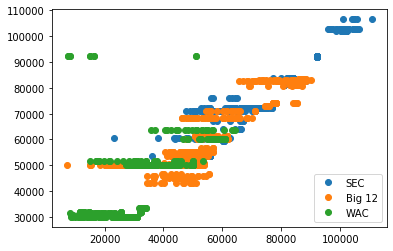

In [133]:
plot(SEC['Attendance'], SEC['Stadium Capacity'], marker='o', linestyle='None', label='SEC')
plot(Big12['Attendance'], Big12['Stadium Capacity'], marker='o', linestyle='None', label='Big 12')
plot(WAC['Attendance'], WAC['Stadium Capacity'], marker='o', linestyle='None', label='WAC')
legend(numpoints=1, loc='best')
show()

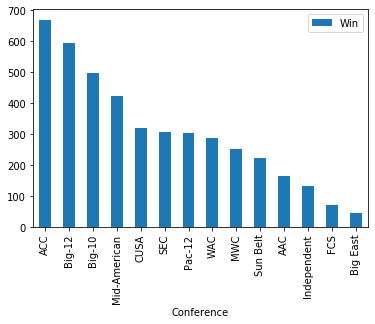

In [130]:
# Wins by Conference - shows which conferences have the most wins - could be kinda cool
wins_conf = cfb.groupby(['Conference'])[['Win']].sum().sort_values(by='Win', ascending=False)
wins_conf.plot(kind='bar')
xlabel = 'Conference'

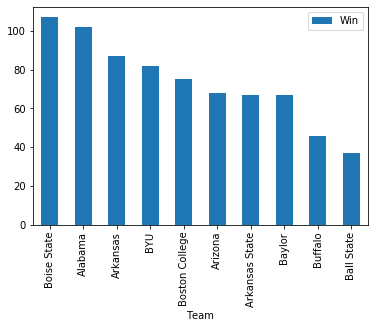

In [118]:
# Teams vs Wins - shows top 10 teams with the most wins - could be kinda cool
team_win = cfb.groupby(['Team'])[['Win']].sum().iloc[:10].sort_values(by='Win',ascending=False)
team_win.plot(kind='bar')

Text(0, 0.5, 'Frequency')

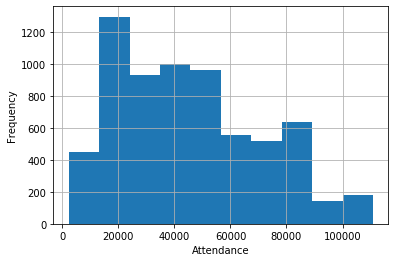

In [62]:
# frequency of attendance - most common is around 20,000 people - overall not super telling
cfb['Attendance'].hist()
xlabel('Attendance')
ylabel('Frequency')

(-1.1048000179467214,
 1.1002285763593342,
 -1.101421049825835,
 1.109316832489613)

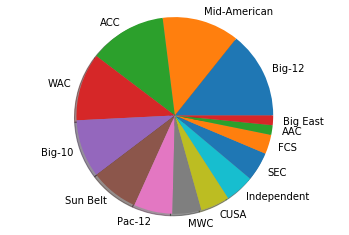

In [131]:
# Shows how the amounts of teams in each conference in our data set - could be kinda cool
conf_numb = cfb[['Team', 'Conference']].drop_duplicates(subset='Team')
conf_numb = conf_numb['Conference'].value_counts()
conf_numb

pie(conf_numb.values,
    labels=conf_numb.index.values,
    shadow=True)
axis('equal')